<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Udemy_Courses_Recommendation_and_Auditor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Udemy Courses Recommendation and Auditor

<hr>

## 1.Importing necessary packages

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
print("The necessary packages are included successfully!")

The necessary packages are included successfully!


## 2. Importing the datasets

In [8]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/udemy_courses.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## 3.Data Formatting

In [9]:
# This dataframe contains some useless columns which must be dropped for a better analytics result
uc = ['url','published_timestamp']  # uc means useless columns
df = df.drop(columns=uc)
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


## 4. Data Exploration

In [10]:
r,c = df.shape
print("Number of customers  = ",r)
print("Number of parameters = ",c)

Number of customers  =  3678
Number of parameters =  10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3678 non-null   int64  
 1   course_title      3678 non-null   object 
 2   is_paid           3678 non-null   bool   
 3   price             3678 non-null   int64  
 4   num_subscribers   3678 non-null   int64  
 5   num_reviews       3678 non-null   int64  
 6   num_lectures      3678 non-null   int64  
 7   level             3678 non-null   object 
 8   content_duration  3678 non-null   float64
 9   subject           3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 262.3+ KB


In [13]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? False


In [16]:
# complete summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


## Some insights:
### 1.Mean price of a course is 66\$,most expensive course is for 200\$. Least price of a course is 0$(free)

### 2.Average subscribers for the courses is 3197 IDs

### 3.Average lecture videos per course is 40

### 4.Average content duration is 4 hours

## 5. Constructing the Spearman's matrix

Text(0.5, 1.0, "Spearman's Correlation Matrix of parameters\n")

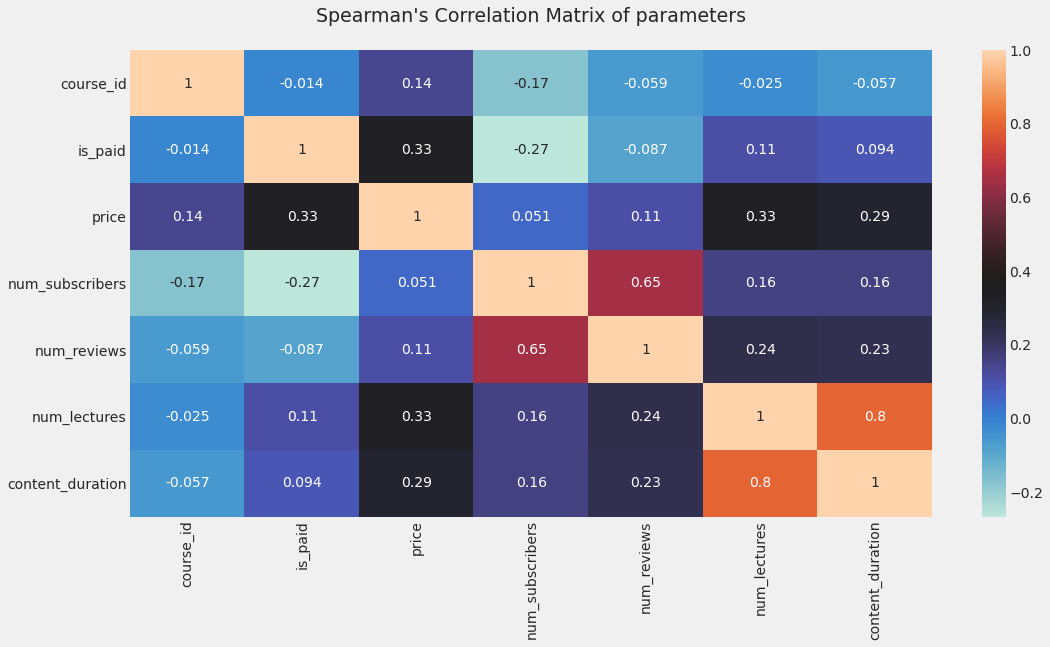

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='icefire')
plt.xticks(rotation=90)
plt.title("Spearman\'s Correlation Matrix of parameters\n",size=19)

## 6. Visualising the parameters

Text(0.5, 1.0, 'Count of difficulty of courses\n')

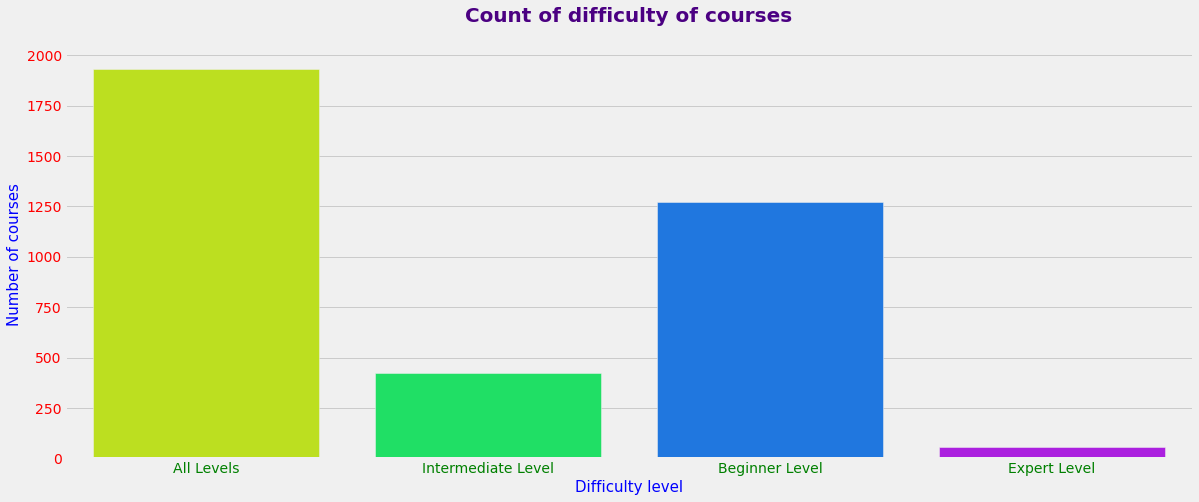

In [23]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='level',palette='hsv')
plt.xlabel('Difficulty level',fontsize='15',color='blue')
plt.ylabel('Number of courses',fontsize='15',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of difficulty of courses\n",fontsize=20,fontweight='bold',color='indigo')

### Most courses are generalized to all levels, however the expert level or hard courses are very less in count

In [24]:
data = df['is_paid'].value_counts()
data

True     3368
False     310
Name: is_paid, dtype: int64

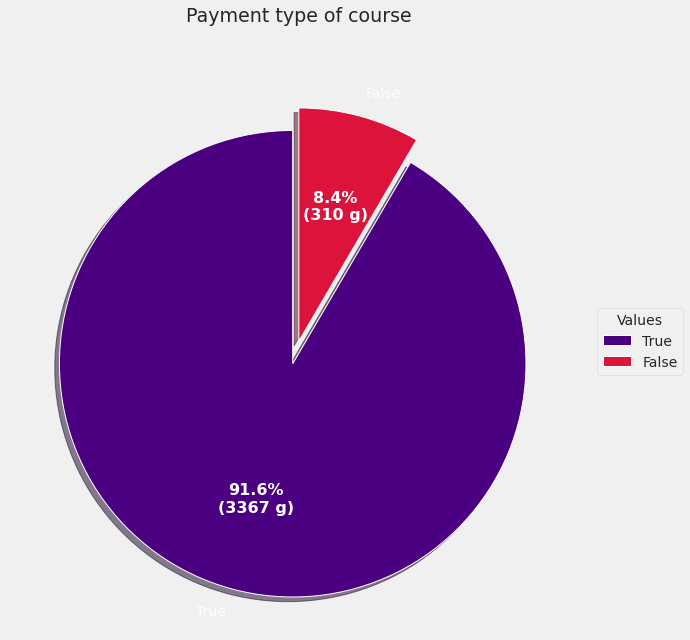

In [26]:
mag = ['True','False']
  
data = [3368,310]
explode = (0.1, 0.0) 
  
# Creating color parameters 
colors = ("indigo","crimson") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = mag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="white")) 
  
# Adding legend 
ax.legend(wedges, mag, 
          title ="Values", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 16, weight ="bold") 
ax.set_title("Payment type of course\n",size=19) 
  
# show plot 

plt.show()

### Most courses are paid courses, in Udemy



Text(0.5, 1.0, 'Count of course types\n')

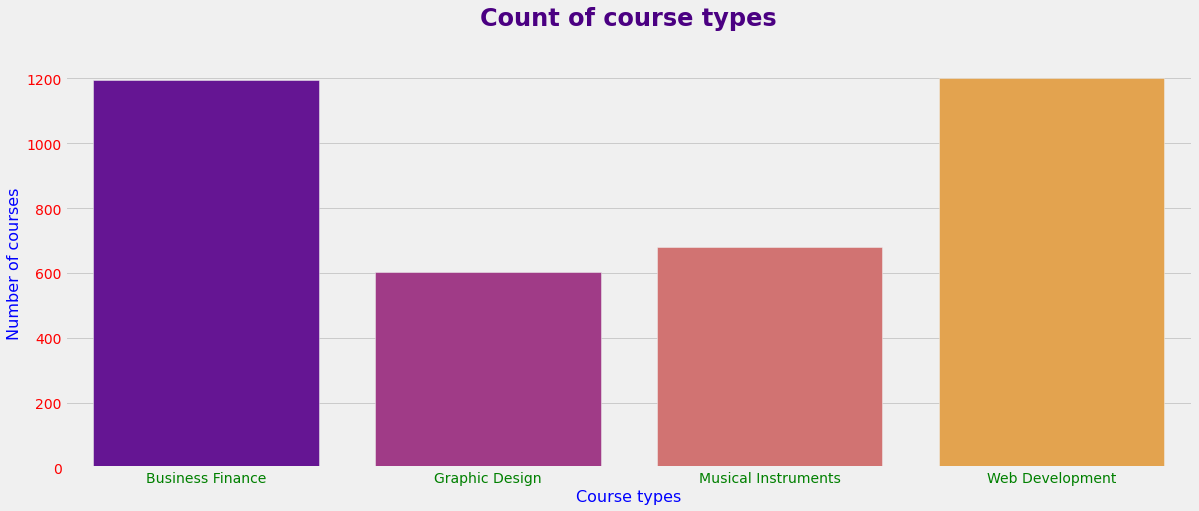

In [28]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='subject',palette='plasma')
plt.xlabel('Course types',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='indigo')

### Most sold courses are of Web Development and least sold are of Graphics Design

Text(0.5, 1.0, 'Count of number of courses vs course costs\n')

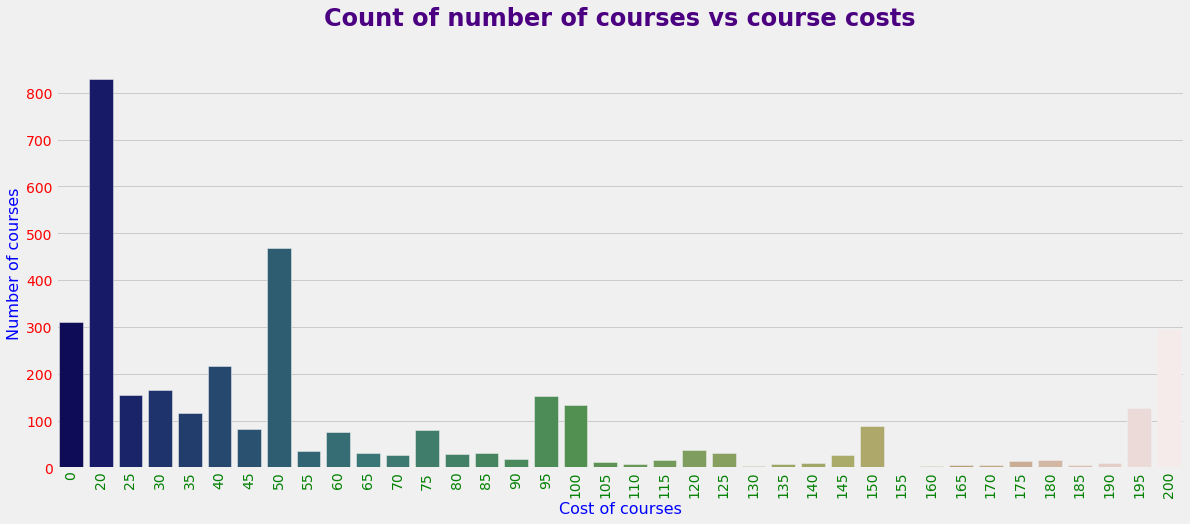

In [29]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='price',palette='gist_earth')
plt.xlabel('Cost of courses',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green',rotation=90)
plt.yticks(fontsize='14',color='red')
plt.title("Count of number of courses vs course costs\n",fontsize=24,fontweight='bold',color='indigo')

### Most courses in Udemy allow to access their contents for 20\$. Few courses can be as costly as 200\$ too. However, there are approximately 300 free courses as well, 😃

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of lectures\n')

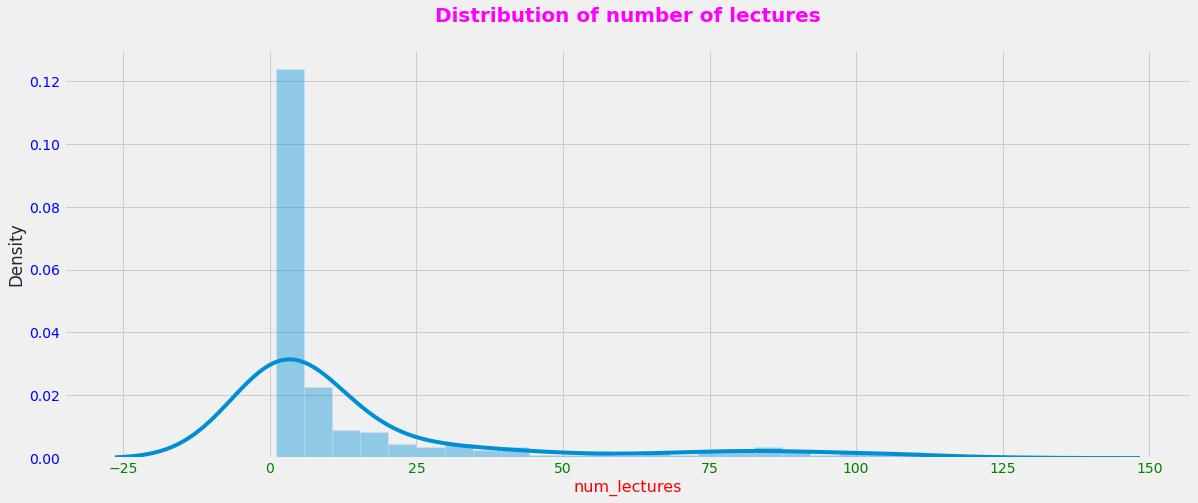

In [30]:
plt.figure(figsize=(18,7))
plt.xticks(color='green',fontsize=14)
plt.yticks(color='blue',fontsize=14)
plt.xlabel('Number of lectures',fontsize=16,color='red')
sns.distplot(df['num_lectures'].value_counts())
plt.title('Distribution of number of lectures\n',fontsize=20,fontweight='bold',color='magenta')

Text(0.5, 1.0, 'Scattered plot of number of lectures vs number of reviews\n')

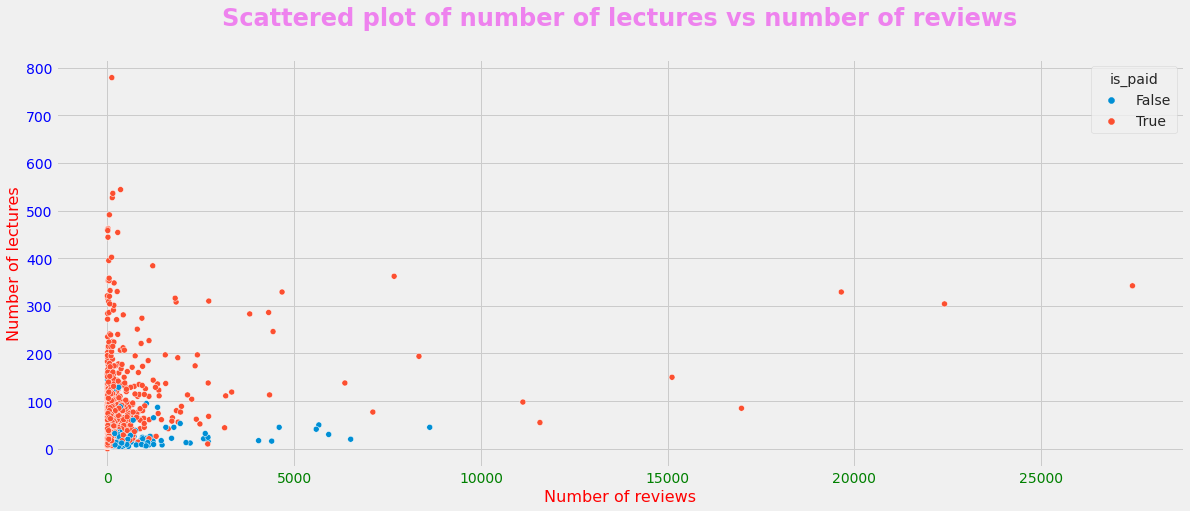

In [31]:
plt.figure(figsize=(18,7))
sns.scatterplot(x="num_reviews", y= "num_lectures", hue= "is_paid", data = df)
plt.xticks(color='green',fontsize=14)
plt.yticks(color='blue',fontsize=14)
plt.xlabel('Number of reviews',fontsize=16,color='red')
plt.ylabel('Number of lectures',fontsize=16,color='red')
plt.title('Scattered plot of number of lectures vs number of reviews\n',fontsize=24,fontweight='bold',color='violet')

### This shows that people tend to review paid courses more than unpaid ones. Afterall, they would justify the price.

Text(0.5, 1.0, 'Scattered plot of number of subscribers vs content duration\n')

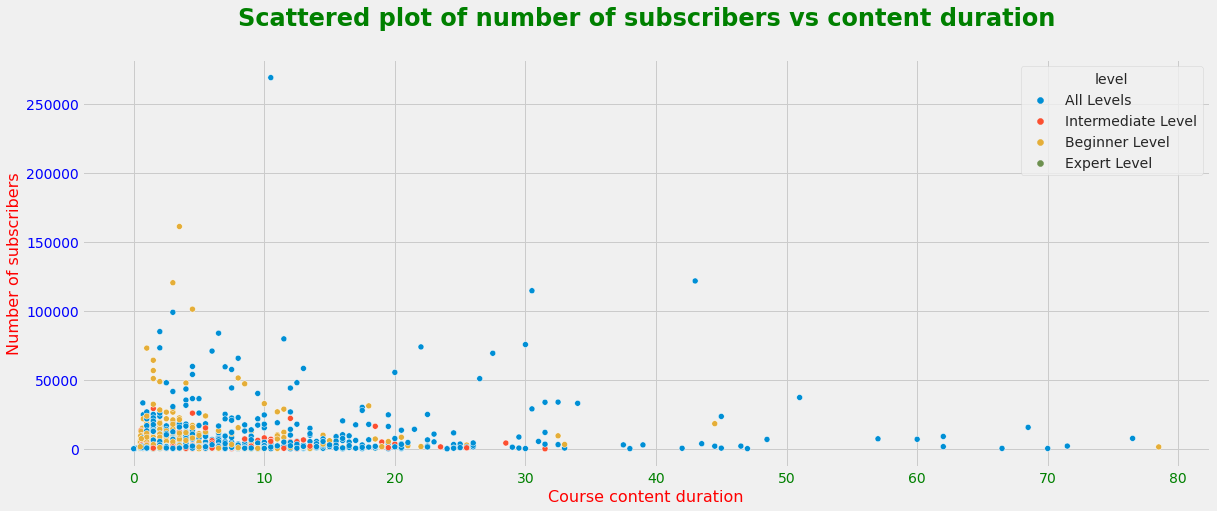

In [33]:
plt.figure(figsize=(18,7))
sns.scatterplot(x="content_duration", y= "num_subscribers", hue= "level", data = df)
plt.xticks(color='green',fontsize=14)
plt.yticks(color='blue',fontsize=14)
plt.xlabel('Course content duration',fontsize=16,color='red')
plt.ylabel('Number of subscribers',fontsize=16,color='red')
plt.title('Scattered plot of number of subscribers vs content duration\n',fontsize=24,fontweight='bold',color='green')

### From this graph we can say that maximum subscribers tend to choose the courses with less than 40 h course duration.

## 7. Customer Based Analytics

In [35]:
top = df.iloc[:,:20]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


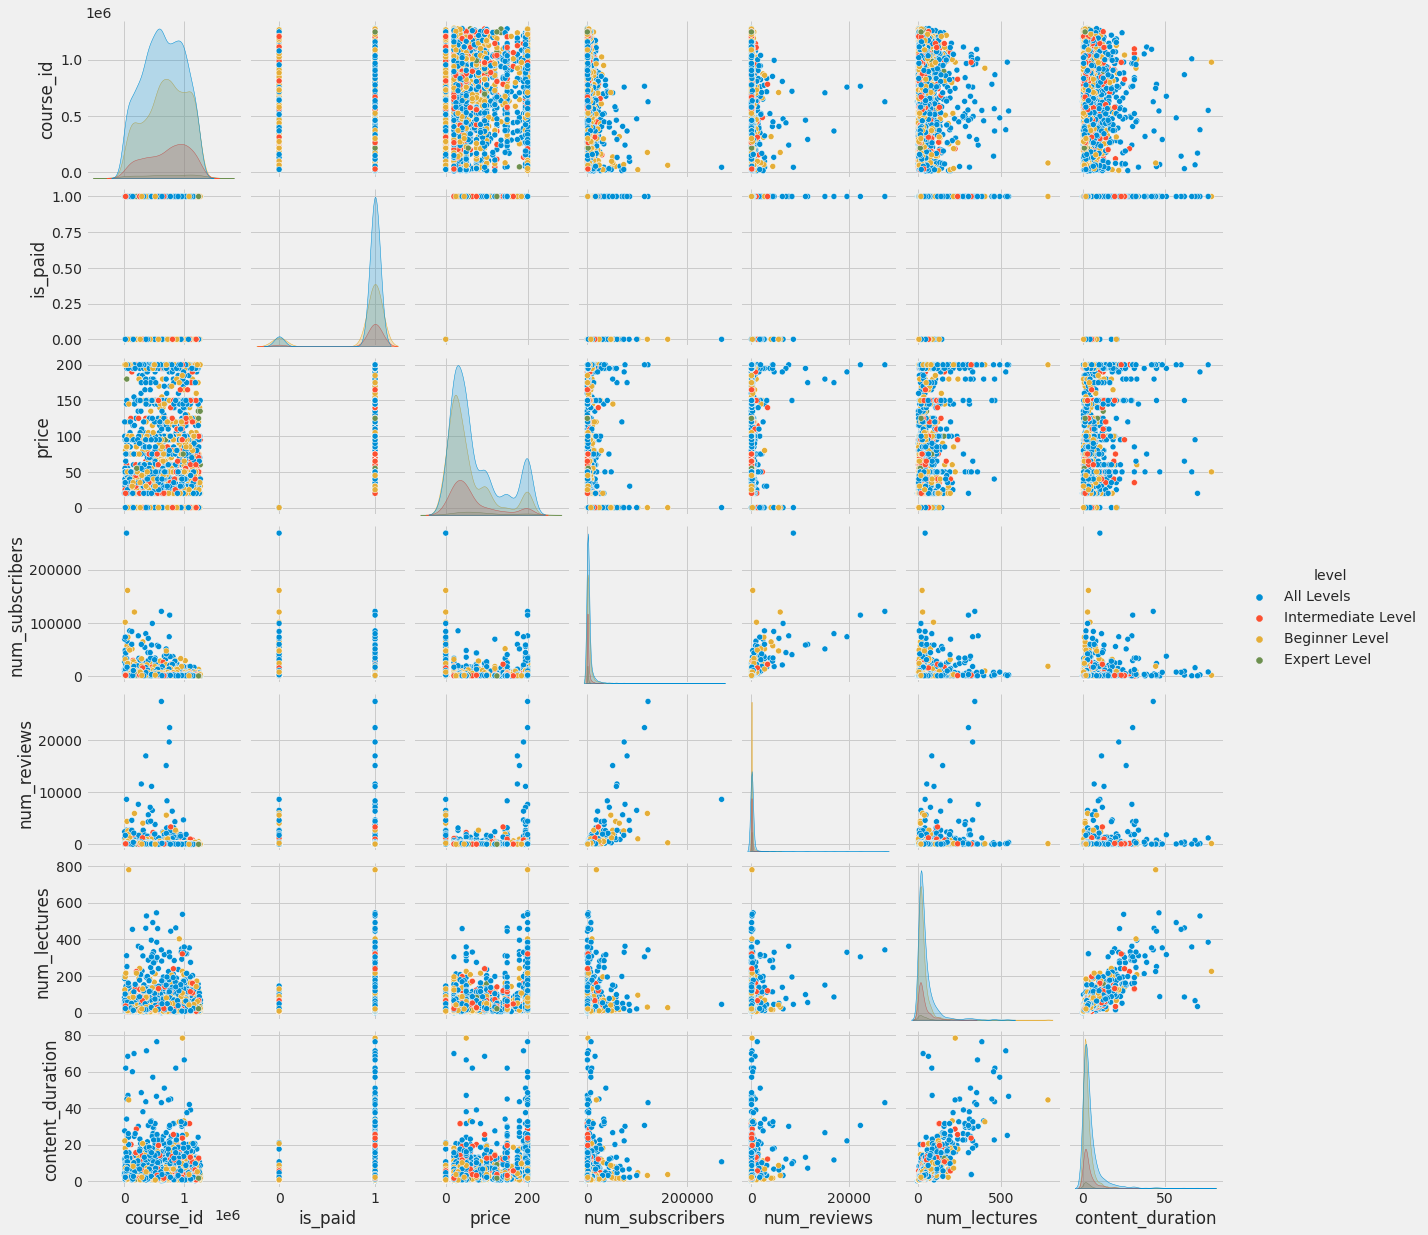

In [37]:
## displaying the course choosing tendency and stats of top 20 customer IDs
sns.pairplot(top,hue='level')

In [60]:
# Costliest courses of Udemy
df.price.to_numpy()
df.course_title.to_numpy()
for i in range(len(df.price)):
  if(df.price[i]==200):
    print(df.course_title[i])


Ultimate Investment Banking Course
How To Maximize Your Profits Trading Options
The Only Investment Strategy You Need For Your Retirement
Forex Trading Secrets of the Pros With Amazon's AWS
Trading Options With Money Flow
Python Algo Trading: Sentiment Trading with News
The Complete Chart Pattern Trading Course: A Proven Approach
Winning Forex Trading with Live Forex Trading Examples
Forex Traders - Create Your First Trading Robot. No Coding!
Investing 101: The Complete Online Investing Course
THE Forex Robot: Incredible ROI (Robot Included)
Mastering High Probability Iron Condor Options Trading
The Complete Short Course on Ethereum
Introduction to Finance, Accounting, Modeling and Valuation
Black Algo Trading: Build Your Trading Robot
Forex Robots: Expect To Earn 175% P.A. Forex Robot Included!
How I Learned Stock Trading (and How You Can Too)
Options Trading - Calendar Spread Course for Every Trader
Learn Accounting. Understand Business.
How to Buy Cheap Options - Options Trading Pri

## 8. Making a course recommender 

In [63]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['subject'])

In [65]:
course_user = df.pivot_table(index='course_id',columns='course_title',values='price')
course_user.head()

course_title,#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs,#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key,#12 Hand Coordination: Let your Hands dance with Ballad 9,#4 Piano Hand Coordination: Fun Piano Runs in 2 Beats C Key,#5 Piano Hand Coordination: Piano Runs in 2 Beats Eb Key,#6 Piano Hand Coordination: Play Open 10 Ballad to 9/4 Song,#7 Piano Hand Coordination: Play Piano Runs in 3 Beats 9/4,"'Geometry Of Chance strategy of defeating the roulette.""",'Greensleeves' Creative Piano Lessons Course,* An Integrated Approach to the Fundamentals of Accounting,1 - Concepts of Statistics For Beginners Step by Step,1 Hour CSS,1 Hour HTML,1 Hour JavaScript,1 hour jQuery,1. Principles of Simple Interest,10 Numbers Every Business Owner Should Know,10. Bonds and Bond Pricing,101 Awesome Rockabilly Guitar Licks,101 Blues riffs - learn how the harmonica superstars do it,15 Motion Graphic Elements in After Effect (Series 2),15 Mandamientos para ganar dinero en Bolsa,150 Rock Guitar Licks You MUST Know,16 Guitar Chords to Jam With - (Beginner - Intermediate),17 Complete JavaScript projects explained step by step,188% Profit in 1Year - Forex ALGO Robot Trading no indicator,2 Easy Steps To Investment And Avoiding Traps,2. Principles of Simple Interest - advanced problems,3 Little Pigs: A Multiple Timeframe Forex Trading Strategy,3 documentos clave para administrar tu empresa con éxito,3 step formula for playing guitar by ear,3. Compound Interest,30 Day Guitar Jump Start for Success,31 Day Guitar Challenge,3D Programming with WebGL and Babylon.js for Beginners,3DS MAX - Learn 3Ds MAX tutorial for Beginners in Urdu Hindi,4 Easy Daily Forex Trades: A Recipe for Trading Success,4 Week Rhythm Mastery,4. Ordinary Simple Annuities: The Basics,48 Logo Designs and Techniques,...,دورة شامل لبرنامج إلستريتور للمبتدئين - Adobe illustrator CC,مدخل في أساسيات الفوطوشوب للمبتدئين فقط,สร้างงานกราฟฟิคแอพพลิเคชั่นมือถือด้วย Adobe Illustrator,สอนเทรดไบนารี่ อ๊อฟชั่นอย่างง่าย,≪虎の巻≫証券取引の「税金のお悩み」解消,✔️ Illustrator CC : Be a Graphic Designer in Illustrator CC,【すぐに覚える！】ASALATO-アサラト(打楽器)初心者向け入門講座,【個人事業主向け】青色申告の記帳を自力で行うための複式簿記の基本,【１日でマスター！】今日からはじめる資産形成,こどもギターレッスン リトルギタリストⅠ,こどもギターレッスン リトルギタリストⅡ,こどもギターレッスン リトルギタリストⅢ（完結編）,なぞるだけですぐできる! 簡単手描きイラスト講座,カードゲームでカンタンに理解する！経済とお金のキホン,トレーディングビュー徹底攻略2017年版,バイナリーオプション取引,ビットコイン生態系｜既存通貨が主役をやめる日,ブルースギター入門,会声会影深度教学,初めてのiDraw入門,商業好設計-Illustrator個性商品設計,株式投資で本当のテクニカル分析ができるようになる,株式投資で本当のファンダメンタル分析ができるようになる,株式投資に向く性格に変えるための心理学を学ぶ,株式投資に必要なスキルの学習手順を学ぶ,画像加工の初心者だとしても、１週間でホームページのトップ画像を製作できるようになる画像製作講座,画像加工の初心者でも「１日」で初歩を覚えられる無料講座,自分に合った投資信託を見つけよう！,見てわかる！やさしく独習アコギ（入門編）TAKA先生のアコースティックギターレッスンⅠ,誰でもわかる Adobe Illustrator CS5,誰でもわかる Adobe Illustrator CS6,誰でもわかる Adobe Photoshop CS5,调色中级课程,调色高级讲解,資産運用の基礎を学ぶファイナンス入門,财务分析与估值建模入门,超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜,캔바(Canva)로 SNS 콘텐츠 만들기,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー
course_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11174,NaN,NaN,N

In [66]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [67]:
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]

In [69]:
print("--------------- Similar courses to your search --------------:\n")
recommendations('Become a Professional Web Developer | Version 3.0')

--------------- Similar courses to your search --------------:



2479    Learning Dynamic Website Design - PHP MySQL an...
2480    ChatBots: Messenger ChatBot with API.AI and No...
2481                                    Projects in HTML5
2482    Programming Foundations: HTML5 + CSS3 for Entr...
2483    How To Make A Wordpress Website 2017 | Divi Th...
2484    Build Your Own Backend REST API using Django R...
2485    Angular and Firebase - Build a Web App with Ty...
2486    Web Development Masterclass - Complete Certifi...
2487                   Spring Boot Tutorial For Beginners
2488    The Complete Bootstrap Masterclass Course - Bu...
2489                                Scaling Docker on AWS
2490                       Learn JavaScript for beginners
2491              HTML Tutorial: HTML & CSS for Beginners
2492             Learn by Doing: Vue JS 2.0 the Right Way
2493          Learn Complete Web Development From Scratch
2494                Introduction to Web Development: HTML
2495    Web Site for Beginners - Learn Web Building li...
2496    How To